# Pith Detection Model + Radial Line

## Setup

In [1]:
import warnings
import tensorflow as tf
import os
import matplotlib.pyplot as plt
import numpy as np
import cv2
from PIL import Image

2023-02-20 21:50:03.355770: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# Disable warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')
#def function_that_warns():
#    warnings.warn("deprecated", DeprecationWarning)

#with warnings.catch_warnings():
#    warnings.simplefilter("ignore")
#    function_that_warns()  # this will not show a warning

## Explore the Pith detection model

- Load model
- Print summary
- Print summary with nested model
- Print summary of nested model
- Print activation function of each layers of model
- Print activation function of each layers of nested model

In [3]:
model = tf.keras.models.load_model('PithDetector')

2023-02-20 21:50:07.267454: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
print(model.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional)  (None, 7, 7, 1280)       4049571   
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dropout (Dropout)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 4,052,133
Trainable params: 3,290,266
Non-trainable params: 761,867
_____________________________________________

In [5]:
print(model.summary(expand_nested=True))

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional)  (None, 7, 7, 1280)       4049571   
|¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯|
| input_1 (InputLayer)      [(None, 224, 224, 3)]     0         |
|                                                               |
| rescaling (Rescaling)     (None, 224, 224, 3)       0         |
|                                                               |
| normalization (Normalizatio  (None, 224, 224, 3)    7         |
| n)                                                            |
|                                                               |
| stem_conv_pad (ZeroPadding2  (None, 225, 225, 3)    0         |
| D)                                                         

| block2b_project_conv (Conv2  (None, 56, 56, 24)     3456      |
| D)                                                            |
|                                                               |
| block2b_project_bn (BatchNo  (None, 56, 56, 24)     96        |
| rmalization)                                                  |
|                                                               |
| block2b_drop (Dropout)    (None, 56, 56, 24)        0         |
|                                                               |
| block2b_add (Add)         (None, 56, 56, 24)        0         |
|                                                               |
| block3a_expand_conv (Conv2D  (None, 56, 56, 144)    3456      |
| )                                                             |
|                                                               |
| block3a_expand_bn (BatchNor  (None, 56, 56, 144)    576       |
| malization)                                                   |
|         

| block4a_project_conv (Conv2  (None, 14, 14, 80)     19200     |
| D)                                                            |
|                                                               |
| block4a_project_bn (BatchNo  (None, 14, 14, 80)     320       |
| rmalization)                                                  |
|                                                               |
| block4b_expand_conv (Conv2D  (None, 14, 14, 480)    38400     |
| )                                                             |
|                                                               |
| block4b_expand_bn (BatchNor  (None, 14, 14, 480)    1920      |
| malization)                                                   |
|                                                               |
| block4b_expand_activation (  (None, 14, 14, 480)    0         |
| Activation)                                                   |
|                                                               |
| block4b_

| block5b_expand_conv (Conv2D  (None, 14, 14, 672)    75264     |
| )                                                             |
|                                                               |
| block5b_expand_bn (BatchNor  (None, 14, 14, 672)    2688      |
| malization)                                                   |
|                                                               |
| block5b_expand_activation (  (None, 14, 14, 672)    0         |
| Activation)                                                   |
|                                                               |
| block5b_dwconv (DepthwiseCo  (None, 14, 14, 672)    16800     |
| nv2D)                                                         |
|                                                               |
| block5b_bn (BatchNormalizat  (None, 14, 14, 672)    2688      |
| ion)                                                          |
|                                                               |
| block5b_

| block6b_expand_bn (BatchNor  (None, 7, 7, 1152)     4608      |
| malization)                                                   |
|                                                               |
| block6b_expand_activation (  (None, 7, 7, 1152)     0         |
| Activation)                                                   |
|                                                               |
| block6b_dwconv (DepthwiseCo  (None, 7, 7, 1152)     28800     |
| nv2D)                                                         |
|                                                               |
| block6b_bn (BatchNormalizat  (None, 7, 7, 1152)     4608      |
| ion)                                                          |
|                                                               |
| block6b_activation (Activat  (None, 7, 7, 1152)     0         |
| ion)                                                          |
|                                                               |
| block6b_

|                                                               |
| block7a_expand_activation (  (None, 7, 7, 1152)     0         |
| Activation)                                                   |
|                                                               |
| block7a_dwconv (DepthwiseCo  (None, 7, 7, 1152)     10368     |
| nv2D)                                                         |
|                                                               |
| block7a_bn (BatchNormalizat  (None, 7, 7, 1152)     4608      |
| ion)                                                          |
|                                                               |
| block7a_activation (Activat  (None, 7, 7, 1152)     0         |
| ion)                                                          |
|                                                               |
| block7a_se_squeeze (GlobalA  (None, 1152)           0         |
| veragePooling2D)                                              |
|         

In [6]:
print(model.layers[1].summary())

Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 224, 224, 3)  0           ['input_1[0][0]']                
                                                                                                  
 normalization (Normalization)  (None, 224, 224, 3)  7           ['rescaling[0][0]']              
                                                                                                  
 stem_conv_pad (ZeroPadding2D)  (None, 225, 225, 3)  0           ['normalization[0][0

 block2a_project_bn (BatchNorma  (None, 56, 56, 24)  96          ['block2a_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block2b_expand_conv (Conv2D)   (None, 56, 56, 144)  3456        ['block2a_project_bn[0][0]']     
                                                                                                  
 block2b_expand_bn (BatchNormal  (None, 56, 56, 144)  576        ['block2b_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block2b_expand_activation (Act  (None, 56, 56, 144)  0          ['block2b_expand_bn[0][0]']      
 ivation)                                                                                         
          

                                                                                                  
 block3b_expand_activation (Act  (None, 28, 28, 240)  0          ['block3b_expand_bn[0][0]']      
 ivation)                                                                                         
                                                                                                  
 block3b_dwconv (DepthwiseConv2  (None, 28, 28, 240)  6000       ['block3b_expand_activation[0][0]
 D)                                                              ']                               
                                                                                                  
 block3b_bn (BatchNormalization  (None, 28, 28, 240)  960        ['block3b_dwconv[0][0]']         
 )                                                                                                
                                                                                                  
 block3b_a

 block4b_bn (BatchNormalization  (None, 14, 14, 480)  1920       ['block4b_dwconv[0][0]']         
 )                                                                                                
                                                                                                  
 block4b_activation (Activation  (None, 14, 14, 480)  0          ['block4b_bn[0][0]']             
 )                                                                                                
                                                                                                  
 block4b_se_squeeze (GlobalAver  (None, 480)         0           ['block4b_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block4b_se_reshape (Reshape)   (None, 1, 1, 480)    0           ['block4b_se_squeeze[0][0]']     
          

                                                                                                  
 block5a_se_squeeze (GlobalAver  (None, 480)         0           ['block5a_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block5a_se_reshape (Reshape)   (None, 1, 1, 480)    0           ['block5a_se_squeeze[0][0]']     
                                                                                                  
 block5a_se_reduce (Conv2D)     (None, 1, 1, 20)     9620        ['block5a_se_reshape[0][0]']     
                                                                                                  
 block5a_se_expand (Conv2D)     (None, 1, 1, 480)    10080       ['block5a_se_reduce[0][0]']      
                                                                                                  
 block5a_s

 block5c_se_excite (Multiply)   (None, 14, 14, 672)  0           ['block5c_activation[0][0]',     
                                                                  'block5c_se_expand[0][0]']      
                                                                                                  
 block5c_project_conv (Conv2D)  (None, 14, 14, 112)  75264       ['block5c_se_excite[0][0]']      
                                                                                                  
 block5c_project_bn (BatchNorma  (None, 14, 14, 112)  448        ['block5c_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block5c_drop (Dropout)         (None, 14, 14, 112)  0           ['block5c_project_bn[0][0]']     
                                                                                                  
 block5c_a

                                                                                                  
 block6b_drop (Dropout)         (None, 7, 7, 192)    0           ['block6b_project_bn[0][0]']     
                                                                                                  
 block6b_add (Add)              (None, 7, 7, 192)    0           ['block6b_drop[0][0]',           
                                                                  'block6a_project_bn[0][0]']     
                                                                                                  
 block6c_expand_conv (Conv2D)   (None, 7, 7, 1152)   221184      ['block6b_add[0][0]']            
                                                                                                  
 block6c_expand_bn (BatchNormal  (None, 7, 7, 1152)  4608        ['block6c_expand_conv[0][0]']    
 ization)                                                                                         
          

                                                                                                  
 block7a_expand_conv (Conv2D)   (None, 7, 7, 1152)   221184      ['block6d_add[0][0]']            
                                                                                                  
 block7a_expand_bn (BatchNormal  (None, 7, 7, 1152)  4608        ['block7a_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block7a_expand_activation (Act  (None, 7, 7, 1152)  0           ['block7a_expand_bn[0][0]']      
 ivation)                                                                                         
                                                                                                  
 block7a_dwconv (DepthwiseConv2  (None, 7, 7, 1152)  10368       ['block7a_expand_activation[0][0]
 D)       

In [7]:
for i, layer in enumerate (model.layers):
    print (i, layer)
    try:
        print ("    ",layer.activation)
    except AttributeError:
        print('   no activation attribute')

0 <keras.engine.input_layer.InputLayer object at 0x10da85ca0>
   no activation attribute
1 <keras.engine.functional.Functional object at 0x12fc98e20>
   no activation attribute
2 <keras.layers.pooling.global_average_pooling2d.GlobalAveragePooling2D object at 0x12fc98d60>
   no activation attribute
3 <keras.layers.regularization.dropout.Dropout object at 0x12fcfb5e0>
   no activation attribute
4 <keras.layers.core.dense.Dense object at 0x12fcfb940>
     <function sigmoid at 0x12af28ee0>


In [8]:
nested_model = model.layers[1]

for i, layer in enumerate (nested_model.layers):
    print (i, layer)
    try:
        print ("    ",layer.activation)
    except AttributeError:
        print('   no activation attribute')

0 <keras.engine.input_layer.InputLayer object at 0x1340e9040>
   no activation attribute
1 <keras.layers.preprocessing.image_preprocessing.Rescaling object at 0x1340e9310>
   no activation attribute
2 <keras.layers.preprocessing.normalization.Normalization object at 0x1340e98e0>
   no activation attribute
3 <keras.layers.reshaping.zero_padding2d.ZeroPadding2D object at 0x1340fb580>
   no activation attribute
4 <keras.layers.convolutional.conv2d.Conv2D object at 0x1340fb640>
     <function linear at 0x12af2c430>
5 <keras.layers.normalization.batch_normalization.BatchNormalization object at 0x1340fbe80>
   no activation attribute
6 <keras.layers.core.activation.Activation object at 0x1341184c0>
     <function swish at 0x12af28820>
7 <keras.layers.convolutional.depthwise_conv2d.DepthwiseConv2D object at 0x134118b20>
     <function linear at 0x12af2c430>
8 <keras.layers.normalization.batch_normalization.BatchNormalization object at 0x13412a370>
   no activation attribute
9 <keras.layers.co

## Prepare DataSet

### Data

We consider a dataset of 100 images to begin with:

In [9]:
#data directory here!
data_dir = "dataset/data" 

In [10]:
images = [] #store the images here!
nr_of_images = 0 #just to count the number of images
for image_name in os.listdir(data_dir):
    image = plt.imread(os.path.join(data_dir, image_name))
    images.append(image)
    nr_of_images += 1

### Greysacle Copies of Data

Let us create grayscale copies of the images (we store them in a separate folder):

In [11]:
if os.path.exists('dataset/grayscale_images') == False:
    os.makedirs('dataset/grayscale_images')
grayscale_images_dir = 'dataset/grayscale_images'

In [12]:
grayscale_images = [] #store the images here!
for image_name in os.listdir(data_dir):
    image = plt.imread(os.path.join(data_dir, image_name))
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray_image = Image.fromarray(gray_image)
    gray_image.save(os.path.join(grayscale_images_dir, image_name))
    gray_image = np.array(gray_image) #convert back to array
    grayscale_images.append(gray_image)

We plot a random image:

In [13]:
rand_nr = 1 #np.random.randint(1, nr_of_images-1, size = 1)[0]

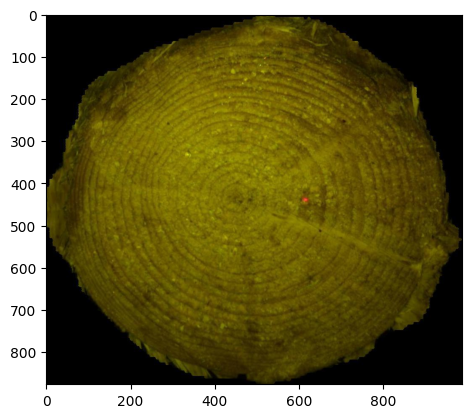

In [14]:
plt.imshow(images[rand_nr])
plt.show()

Display a random grayscale image:

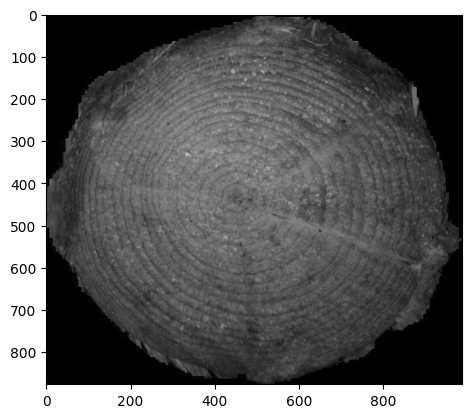

In [15]:
plt.imshow(grayscale_images[rand_nr], cmap = 'gray')
plt.show()

## Obtaining a radial grayscale change from pith to bark

We need to have

- Pith Location
- Raidal line


For radial line, we need to have contour, random point on contour and a line from pith location to the random point on contour

### Pith Location

First of all, we make a prediction on pith location to estimate the location. We use a pre-trained model for esimating pith location. The model is trained on 68 images using transfer learning, for a total number of 50 epochs.

In [16]:
model = tf.keras.models.load_model('PithDetector')

Making a prediction for pith location of a random image:

- Note: We need to resize our image as model is expecting shape of 224 224

```ValueError: Input 0 of layer "model" is incompatible with the layer: expected shape=(None, 224, 224, 3), found shape=(None, 933, 3)```

1/1 [==============================] - 1s 1s/step


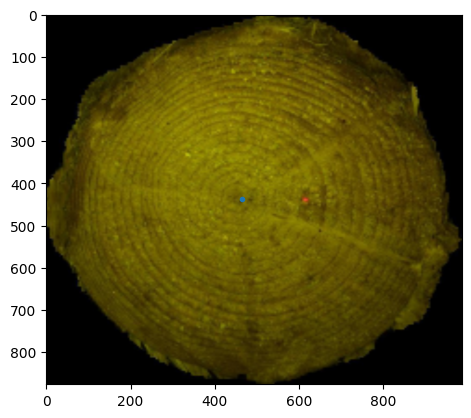

In [17]:
image = images[rand_nr]
height, width = image.shape[0], image.shape[1]
image = cv2.resize(image, (224,224))
image = np.expand_dims(image, axis=0)
prediction = model.predict(image)[0]
image = np.squeeze(image, axis = 0)
image = cv2.resize(image, (width, height))
plt.imshow(image)
plt.plot(prediction[0]*width, prediction[1]*height, '.')
plt.show()

### Radial Line

Finding the contours of the log:

In [18]:
gray_image = grayscale_images[rand_nr]
ret, thresh = cv2.threshold(gray_image, 1, 255, 1)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

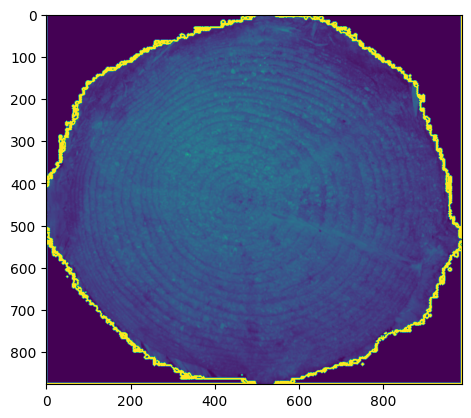

In [19]:
contoursImage = cv2.drawContours(gray_image, contours, -1, 255, 3)
plt.imshow(contoursImage)
plt.show()

In [20]:
#contours_array
contours_array = []
for i in range(len(contours)):
    for j in range(len(contours[i])):
        contours_array.append(contours[i][j][0])

#### Single Raidal Line

Select a random point along the contour:

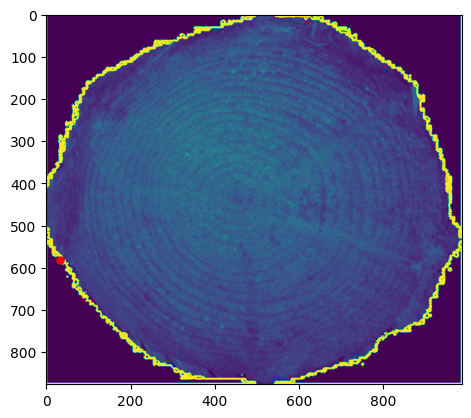

In [21]:
random_nr = np.random.randint(0, len(contours_array)-1, size = 1)[0]
random_point_on_contour = contours_array[random_nr]
plt.imshow(gray_image)
plt.plot(random_point_on_contour[0], random_point_on_contour[1], '.', color = 'r', markersize = 10)
plt.show()

Draw line between point and estimated pith location:

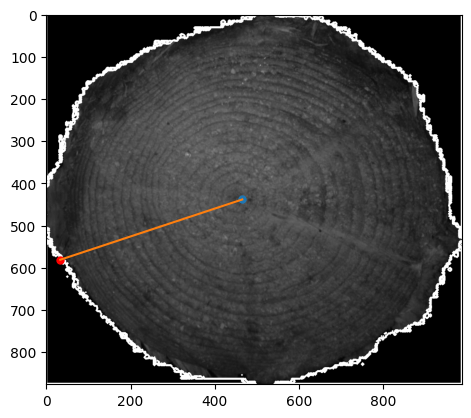

In [22]:
plt.imshow(gray_image, cmap = 'gray')
plt.plot(prediction[0]*width, prediction[1]*height, '.', markersize = 10)
plt.plot(random_point_on_contour[0], random_point_on_contour[1], '.', color = 'r', markersize = 10)
plt.plot(np.array([random_point_on_contour[0], prediction[0]*width]), np.array([random_point_on_contour[1], prediction[1]*height]))
plt.show()

#### Multiple Raidal Lines

Select a random point along the contour:

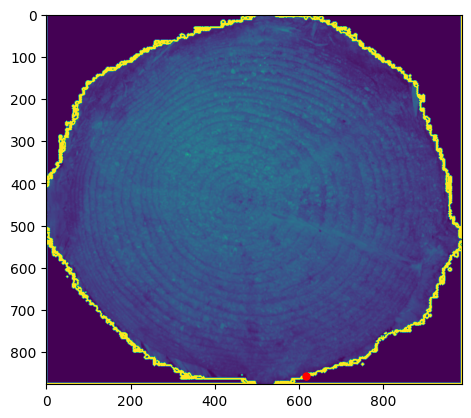

In [23]:
random_nr_one = np.random.randint(0, len(contours_array)-1, size = 1)[0]
random_point_on_contour_one = contours_array[random_nr_one]
plt.imshow(gray_image)
plt.plot(random_point_on_contour_one[0], random_point_on_contour_one[1], '.', color = 'r', markersize = 10)
plt.show()

Select a random point along the contour:

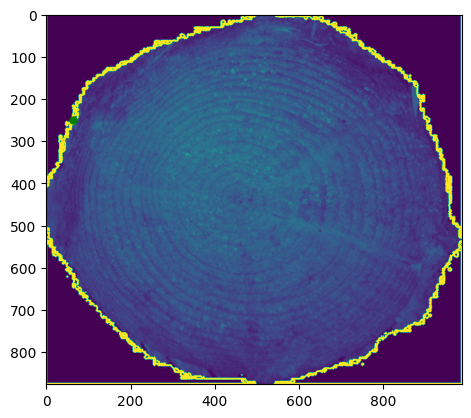

In [24]:
random_nr_two = np.random.randint(0, len(contours_array)-1, size = 1)[0]
random_point_on_contour_two = contours_array[random_nr_two]
plt.imshow(gray_image)
plt.plot(random_point_on_contour_two[0], random_point_on_contour_two[1], '.', color = 'g', markersize = 10)
plt.show()

Select a random point along the contour:

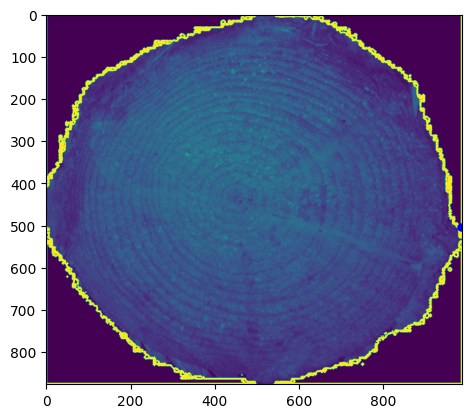

In [25]:
random_nr_three = np.random.randint(0, len(contours_array)-1, size = 1)[0]
random_point_on_contour_three = contours_array[random_nr_three]
plt.imshow(gray_image)
plt.plot(random_point_on_contour_three[0], random_point_on_contour_three[1], '.', color = 'b', markersize = 10)
plt.show()

Draw lines between points and estimated pith location:

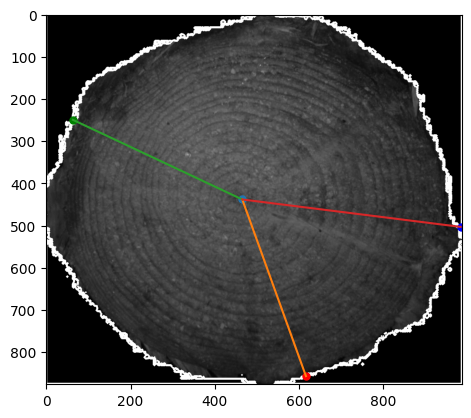

In [26]:
plt.imshow(gray_image, cmap = 'gray')
plt.plot(prediction[0]*width, prediction[1]*height, '.', markersize = 10)

plt.plot(random_point_on_contour_one[0], random_point_on_contour_one[1], '.', color = 'r', markersize = 10)
plt.plot(np.array([random_point_on_contour_one[0], prediction[0]*width]), np.array([random_point_on_contour_one[1], prediction[1]*height]))

plt.plot(random_point_on_contour_two[0], random_point_on_contour_two[1], '.', color = 'g', markersize = 10)
plt.plot(np.array([random_point_on_contour_two[0], prediction[0]*width]), np.array([random_point_on_contour_two[1], prediction[1]*height]))

plt.plot(random_point_on_contour_three[0], random_point_on_contour_three[1], '.', color = 'b', markersize = 10)
plt.plot(np.array([random_point_on_contour_three[0], prediction[0]*width]), np.array([random_point_on_contour_three[1], prediction[1]*height]))

plt.show()

### Obtaining a radial grayscale change from pith to bark

Obtaining grayscale changes along line (here done by taking a fixed number of points along the line):

In [27]:
line = np.linspace(np.array([prediction[0]*width, prediction[1]*height]), random_point_on_contour, 100) # I choose 100 points

In [28]:
#we convert to integer numbers
for i in range(len(line)):
    for j in range(2):
        line[i,j] = int(line[i,j])
        
line = line.astype('int') #we do this for proper indexing

Make sure that we are actually along the line (or close to)

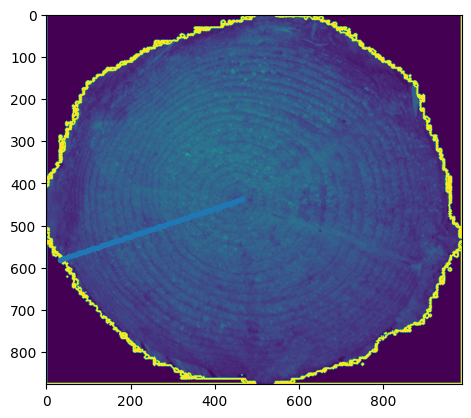

In [29]:
plt.imshow(gray_image)
plt.plot(line[:,0], line[:,1], '.')
plt.show()

Now let us look at grayscale in this direction:

In [30]:
pixel_values = []
i = 1
while i < len(line):
    value = gray_image[line[i][1]-1, line[i][0]-1] 
    pixel_values.append(value)
    i += 1

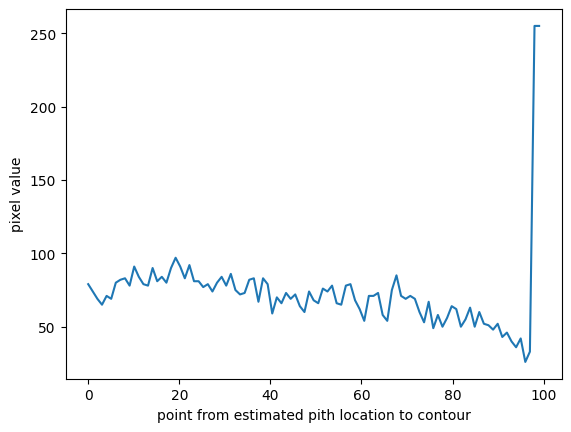

In [31]:
plt.plot(np.linspace(0,99,99), pixel_values)
plt.xlabel('point from estimated pith location to contour')
plt.ylabel('pixel value')
plt.show()

Obtaining grayscale changes along multiple lines (here done by taking a fixed number of points along the line):

In [32]:
line_one = np.linspace(np.array([prediction[0]*width, prediction[1]*height]), random_point_on_contour_one, 100) # I choose 100 points

In [33]:
line_two = np.linspace(np.array([prediction[0]*width, prediction[1]*height]), random_point_on_contour_two, 100) # I choose 100 points

In [34]:
line_three = np.linspace(np.array([prediction[0]*width, prediction[1]*height]), random_point_on_contour_three, 100) # I choose 100 points

In [35]:
#we convert to integer numbers
for i in range(len(line_two)):
    for j in range(2):
        line_one[i,j] = int(line_one[i,j])
        
line_one = line_one.astype('int') #we do this for proper indexing

In [36]:
#we convert to integer numbers
for i in range(len(line_two)):
    for j in range(2):
        line_two[i,j] = int(line_two[i,j])
        
line_two = line_two.astype('int') #we do this for proper indexing

In [37]:
#we convert to integer numbers
for i in range(len(line_three)):
    for j in range(2):
        line_three[i,j] = int(line_three[i,j])
        
line_three = line_three.astype('int') #we do this for proper indexing

Make sure that we are actually along the line (or close to)

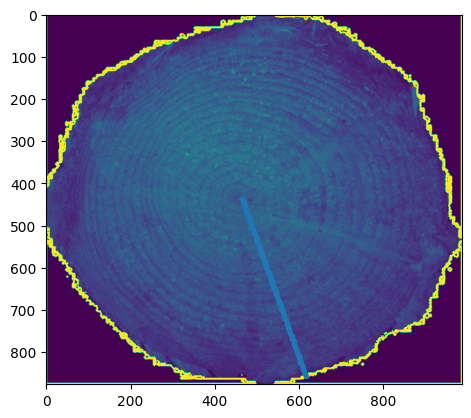

In [38]:
plt.imshow(gray_image)
plt.plot(line_one[:,0], line_one[:,1], '.')
plt.show()

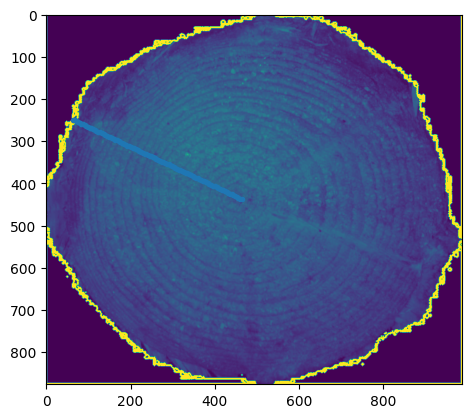

In [39]:
plt.imshow(gray_image)
plt.plot(line_two[:,0], line_two[:,1], '.')
plt.show()

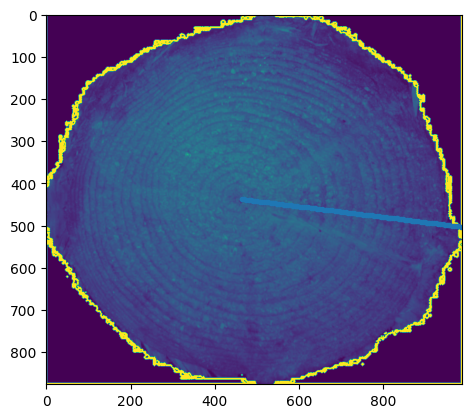

In [40]:
plt.imshow(gray_image)
plt.plot(line_three[:,0], line_three[:,1], '.')
plt.show()

Now let us look at grayscale in this direction:

In [41]:
pixel_values_one = []
i = 1
while i < len(line_one):
    value = gray_image[line_one[i][1]-1, line_one[i][0]-1] 
    pixel_values_one.append(value)
    i += 1

In [42]:
pixel_values_two = []
i = 1
while i < len(line_two):
    value = gray_image[line_two[i][1]-1, line_two[i][0]-1] 
    pixel_values_two.append(value)
    i += 1

In [43]:
pixel_values_three = []
i = 1
while i < len(line_three):
    value = gray_image[line_three[i][1]-1, line_three[i][0]-1] 
    pixel_values_three.append(value)
    i += 1

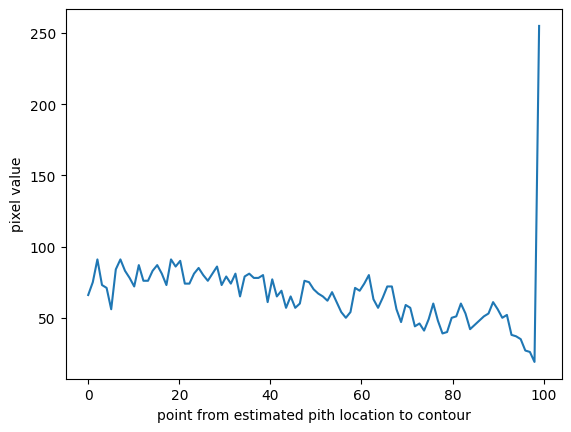

In [44]:
plt.plot(np.linspace(0,99,99), pixel_values_one)
plt.xlabel('point from estimated pith location to contour')
plt.ylabel('pixel value')
plt.show()

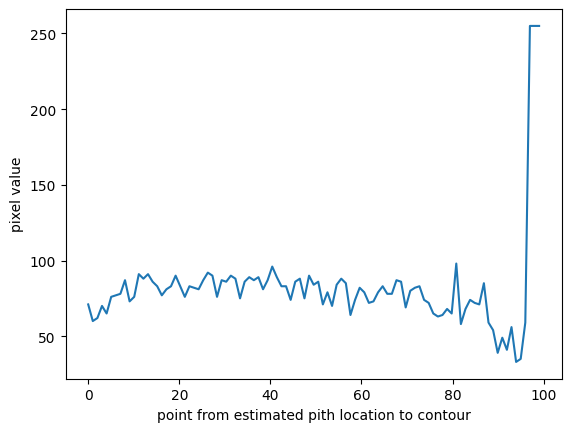

In [45]:
plt.plot(np.linspace(0,99,99), pixel_values_two)
plt.xlabel('point from estimated pith location to contour')
plt.ylabel('pixel value')
plt.show()

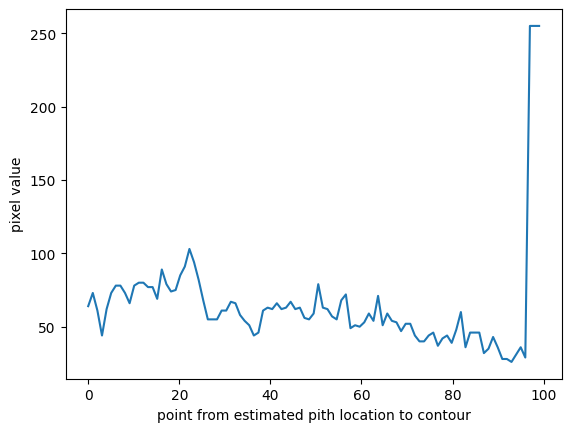

In [46]:
plt.plot(np.linspace(0,99,99), pixel_values_three)
plt.xlabel('point from estimated pith location to contour')
plt.ylabel('pixel value')
plt.show()

Increasing and decreasing sequences

In [47]:
def numOfSubseq(arr, n):
    i, inc_count, dec_count = 0, 0, 0
    max = [0]*n
    min = [0]*n
 
    # k2, k1 are used to store the count of max and min array
    k1 = 0
    k2 = 0
 
    # Comparison to store the index of first element of array
    if (arr[0] < arr[1]):
        min[k1] = 0
        k1 += 1
    else:
        max[k2] = 0
        k2 += 1
 
    # Comparison to store the index from second to second last index of array
    for i in range(1, n-1):
        if (arr[i] < arr[i - 1] and arr[i] < arr[i + 1]):
            min[k1] = i
            k1 += 1
 
        if (arr[i] > arr[i - 1] and arr[i] > arr[i + 1]):
            max[k2] = i
            k2 += 1
 
    # Comparison to store the index of last element of array
    if (arr[n - 1] < arr[n - 2]):
        min[k1] = n - 1
        k1 += 1
    else:
        max[k2] = n - 1
        k2 += 1
 
    # Count of number of maximal contiguous increasing and decreasing subsequences
    if (min[0] == 0):
        inc_count = k2
        dec_count = k1 - 1
    else:
        inc_count = k2 - 1
        dec_count = k1
 
    print("Increasing Subsequence Count: ", inc_count)
    print("Decreasing Subsequence Count: ", dec_count)
    print("Increasing and Decreasing Subsequence Count: ", inc_count + dec_count)

In [48]:
numOfSubseq(pixel_values,99)
numOfSubseq(pixel_values_one,99)
numOfSubseq(pixel_values_two,99)
numOfSubseq(pixel_values_three,99)

Increasing Subsequence Count:  31
Decreasing Subsequence Count:  31
Increasing and Decreasing Subsequence Count:  62
Increasing Subsequence Count:  26
Decreasing Subsequence Count:  23
Increasing and Decreasing Subsequence Count:  49
Increasing Subsequence Count:  28
Decreasing Subsequence Count:  27
Increasing and Decreasing Subsequence Count:  55
Increasing Subsequence Count:  20
Decreasing Subsequence Count:  21
Increasing and Decreasing Subsequence Count:  41


# Summary

In [49]:
#print(contours_array)
#print(line)
#print(line_one)
#print(line_two)
#print(line_three)

In [50]:
max_contours_array = np.array(contours_array).max(axis=0, keepdims=True)

max_line = line.max(axis=0, keepdims=True)
max_line_one = line_one.max(axis=0, keepdims=True)
max_line_two = line_two.max(axis=0, keepdims=True)
max_line_three = line_three.max(axis=0, keepdims=True)

min_contours_array = np.array(contours_array).min(axis=0, keepdims=True)

min_line = line.min(axis=0, keepdims=True)
min_line_one = line_one.min(axis=0, keepdims=True)
min_line_two = line_two.min(axis=0, keepdims=True)
min_line_three = line_three.min(axis=0, keepdims=True)

In [51]:
print("Image shape: ", gray_image.shape) #(height, width)
print("Pith location: ", [prediction[0]*width, prediction[1]*height])
print("\n")

print("Random point on contour: ", random_point_on_contour) #(width, height)
print("Random point on contour one: ", random_point_on_contour_one) #(width, height)
print("Random point on contour two: ", random_point_on_contour_two) #(width, height)
print("Random point on contour three: ", random_point_on_contour_three) #(width, height)
print("\n")

print("Max contours array: ",max_contours_array) #(width, height)
print("\n")

print(max_line) #(width, height)
print(max_line_one) #(width, height)
print(max_line_two) #(width, height)
print(max_line_three) #(width, height)
print("\n")

print(min_line) #(width, height)
print(min_line_one) #(width, height)
print(min_line_two) #(width, height)
print(min_line_three) #(width, height)
print("\n")

Image shape:  (877, 986)
Pith location:  [465.03582614660263, 437.97384336590767]


Random point on contour:  [ 33 581]
Random point on contour one:  [616 857]
Random point on contour two:  [ 63 249]
Random point on contour three:  [983 503]


Max contours array:  [[985 876]]


[[465 581]]
[[616 857]]
[[465 437]]
[[983 503]]


[[ 33 437]]
[[465 437]]
[[ 63 249]]
[[465 437]]




# Why i changed index

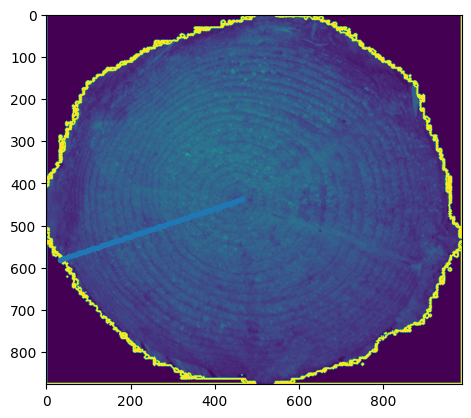

In [52]:
plt.imshow(gray_image)
plt.plot(line[:,0], line[:,1], '.')
plt.show()

In [53]:
i = 1
while i < len(line):
    gray_image[line[i][1]-1, line[i][0]-1] = 255
    i += 1

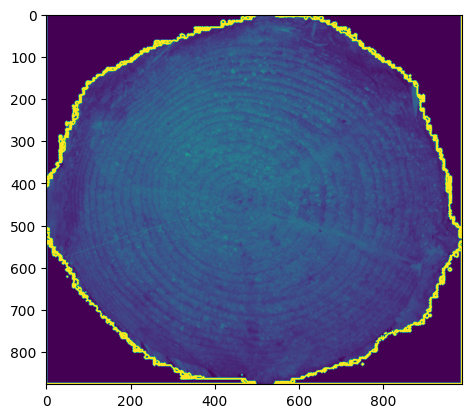

In [54]:
plt.imshow(gray_image)
plt.show()

In [55]:
#cv2.imwrite('Grayscale image of Tree Log.jpg', gray_image)